1. How to load data?
2. How to work on csv / tsv file?
3. Basic Statistics on Data.
4. Data Cleaning with each column.
5. Choice description
6. Regular Expression
7. Solve some questions from dataset.

# DATA CLEANING PANDAS(TASK1)


In [1]:
# importing libraries
import numpy as np
import pandas as pd


## Read Data

# New Section

In [2]:
data = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")


In [ ]:
data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1
5,5,44.0,$77k-$89k,1.4,"India,In",1999,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",-1,-1
7,7,44.0,$44k-$99k,-1.0,Australia Aus,-1,-1
8,8,35.0,$44k-$99k,5.4,"New York,Ny",-1,-1
9,9,22.0,$44k-$99k,7.7,"India,In",-1,TRUE


1. Missing Values


In [7]:
df = pd.DataFrame(data)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
print("\nMissing Values After Handling:\n", df.isnull().sum())

Missing Values:
 Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

Missing Values After Handling:
 Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64


2. Data Types

In [9]:
data_types = df.dtypes
print("Data Types:\n", data_types)
print("\nAlignment with Expected Types:")
print("Age:", data_types['Age'] in [float, int])
print("Salary:", data_types['Salary'] in [float, int])
print("Rating:", data_types['Rating'] in [float])
print("Location:", data_types['Location'] in [str])
print("Established:", data_types['Established'] in [int])
print("Easy Apply:", data_types['Easy Apply'] in [bool])


Data Types:
 Index            int64
Age            float64
Salary          object
Rating         float64
Location        object
Established      int64
Easy Apply      object
dtype: object

Alignment with Expected Types:
Age: True
Salary: False
Rating: True
Location: False
Established: True
Easy Apply: False


3. Outliers


In [11]:
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

def identify_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

age_outliers = identify_outliers('Age')
rating_outliers = identify_outliers('Rating')
established_outliers = identify_outliers('Established')

print("\nPotential Outliers in Age:\n", age_outliers)
print("\nPotential Outliers in Rating:\n", rating_outliers)
print("\nPotential Outliers in Established:\n", established_outliers)


Summary Statistics:
            Index        Age     Rating  Established
count  29.000000  22.000000  28.000000    29.000000
mean   14.000000  39.045455   3.528571  1638.620690
std     8.514693  16.134781   2.825133   762.079599
min     0.000000  13.000000  -1.000000    -1.000000
25%     7.000000  25.000000   1.050000  1935.000000
50%    14.000000  39.500000   4.200000  1984.000000
75%    21.000000  50.000000   5.400000  1999.000000
max    28.000000  66.000000   7.800000  2020.000000

Potential Outliers in Age:
 Empty DataFrame
Columns: [Index, Age, Salary, Rating, Location, Established, Easy Apply]
Index: []

Potential Outliers in Rating:
 Empty DataFrame
Columns: [Index, Age, Salary, Rating, Location, Established, Easy Apply]
Index: []

Potential Outliers in Established:
    Index   Age     Salary  Rating       Location  Established Easy Apply
2      2   NaN  $77k-$89k    -1.0    New York,Ny           -1         -1
6      6  21.0  $44k-$99k     0.0    New York,Ny           -1        

<ipython-input-11-6d828f904ad1>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-11-6d828f904ad1>:11: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


4. Salary Formatting:


In [16]:
print("Salary Column Information:\n", df['Salary'].unique())
print("\nData Type of 'Salary' Column:", df['Salary'].dtype)
if df['Salary'].dtype == object:
    salary_range = df['Salary'].str.extract('(\d+)-(\d+)')
    salary_range.columns = ['Salary_Min', 'Salary_Max']
    df['Salary'] = salary_range.astype(float).mean(axis=1)
print("\nSummary Statistics After Formatting 'Salary' Column:\n", df['Salary'].describe())


Salary Column Information:
 [nan]

Data Type of 'Salary' Column: float64

Summary Statistics After Formatting 'Salary' Column:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Salary, dtype: float64


5.Location Standardization

In [17]:
unique_locations = df['Location'].unique()
print("Unique Locations:\n", unique_locations)

# Standardize locations by converting to lowercase and removing extra spaces
df['Location'] = df['Location'].str.lower().str.strip()
# After standardization, explore unique values again
unique_standardized_locations = df['Location'].unique()
# Display unique standardized values
print("\nUnique Standardized Locations:\n", unique_standardized_locations)


Unique Locations:
 ['India,In' 'New York,Ny' 'India In' 'Australia Aus']

Unique Standardized Locations:
 ['india,in' 'new york,ny' 'india in' 'australia aus']


6. Established Column

In [19]:
unique_established_values = df['Established'].unique()
print("Unique Established Values:\n", unique_established_values)
anomalies = df[df['Established'].apply(lambda x: not str(x).isdigit())]
print("\nRows with Anomalies in 'Established' Column:\n", anomalies)
unique_established_values_after_handling = df['Established'].unique()
print("\nUnique Established Values After Handling Anomalies:\n", unique_established_values_after_handling)


Unique Established Values:
 [1999 2002   -1 1988 2008 2009 2019 2020 1984 1943 1954 1955 1944 1946
 1987 1980 1934 1935 1932]

Rows with Anomalies in 'Established' Column:
    Index   Age  Salary  Rating       Location  Established Easy Apply
2      2   NaN     NaN    -1.0    new york,ny           -1         -1
6      6  21.0     NaN     0.0    new york,ny           -1         -1
7      7  44.0     NaN    -1.0  australia aus           -1         -1
8      8  35.0     NaN     5.4    new york,ny           -1         -1
9      9  22.0     NaN     7.7       india,in           -1       TRUE

Unique Established Values After Handling Anomalies:
 [1999 2002   -1 1988 2008 2009 2019 2020 1984 1943 1954 1955 1944 1946
 1987 1980 1934 1935 1932]


7. Easy Apply Indicator

In [22]:
unique_easy_apply_values = df['Easy Apply'].unique()
print("Unique Easy Apply Values:\n", unique_easy_apply_values)
print("\nData Type of 'Easy Apply' Column:", df['Easy Apply'].dtype)
df['Easy Apply'] = df['Easy Apply'].map({'TRUE': True, 'FALSE': False, True: True, False: False})
print("\nData Type of 'Easy Apply' Column After Transformation:", df['Easy Apply'].dtype)
print("\nUnique Easy Apply Values After Transformation:\n", df['Easy Apply'].unique())


Unique Easy Apply Values:
 [True nan]

Data Type of 'Easy Apply' Column: object

Data Type of 'Easy Apply' Column After Transformation: object

Unique Easy Apply Values After Transformation:
 [True nan]


8. Rating Range

Rating Column Statistics:
 count    28.000000
mean      3.528571
std       2.825133
min      -1.000000
25%       1.050000
50%       4.200000
75%       5.400000
max       7.800000
Name: Rating, dtype: float64


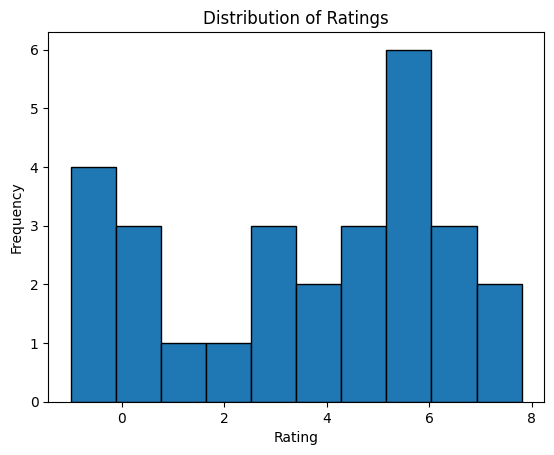


Potential Outliers in Rating:
 Empty DataFrame
Columns: [Index, Age, Salary, Rating, Location, Established, Easy Apply]
Index: []


In [23]:
rating_stats = df['Rating'].describe()
print("Rating Column Statistics:\n", rating_stats)
import matplotlib.pyplot as plt

plt.hist(df['Rating'].dropna(), bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
def identify_rating_outliers():
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]
    return outliers
rating_outliers = identify_rating_outliers()
print("\nPotential Outliers in Rating:\n", rating_outliers)

40-100

40000-100000

9. Age Distribution:

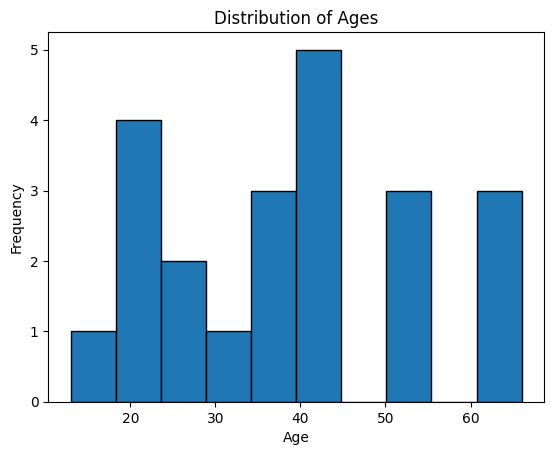

Age Column Statistics:
 count    22.000000
mean     39.045455
std      16.134781
min      13.000000
25%      25.000000
50%      39.500000
75%      50.000000
max      66.000000
Name: Age, dtype: float64

Potential Unusual Entries in Age:
 Empty DataFrame
Columns: [Index, Age, Salary, Rating, Location, Established, Easy Apply]
Index: []


In [24]:
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna(), bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')
plt.show()
age_stats = df['Age'].describe()
print("Age Column Statistics:\n", age_stats)
unusual_entries = df[(df['Age'] < 0) | (df['Age'] > 100)]

# Print potential unusual entries
print("\nPotential Unusual Entries in Age:\n", unusual_entries)

10. Handling Special Characters

In [25]:
text_columns = ['Location']
for column in text_columns:
    unique_values = df[column].unique()
    print(f"Unique Values in '{column}':\n", unique_values)

    # Explore and clean special characters
    df[column] = df[column].apply(lambda x: ''.join(e for e in str(x) if e.isalnum() or e.isspace()))

# Display unique values again after cleaning
for column in text_columns:
    unique_values_after_cleaning = df[column].unique()
    print(f"\nUnique Values in '{column}' After Cleaning:\n", unique_values_after_cleaning)


Unique Values in 'Location':
 ['india,in' 'new york,ny' 'india in' 'australia aus']

Unique Values in 'Location' After Cleaning:
 ['indiain' 'new yorkny' 'india in' 'australia aus']


11. Data Integrity


Established and Age Mismatch:
     Index   Age  Salary  Rating       Location  Established Easy Apply
0       0  44.0     NaN     5.4        indiain         1999       True
1       1  66.0     NaN     3.5     new yorkny         2002       True
3       3  64.0     NaN     4.4       india in         1988        NaN
4       4  25.0     NaN     6.4  australia aus         2002        NaN
5       5  44.0     NaN     1.4        indiain         1999       True
10     10  55.0     NaN     5.4        indiain         2008       True
11     11  44.0     NaN     6.7        indiain         2009        NaN
12     12   NaN     NaN     0.0        indiain         1999        NaN
13     13  25.0     NaN    -1.0  australia aus         2019       True
14     14  66.0     NaN     4.0  australia aus         2020       True
15     15  44.0     NaN     3.0  australia aus         1999        NaN
16     16  19.0     NaN     4.5        indiain         1984        NaN
17     17   NaN     NaN     5.3     new yorkny

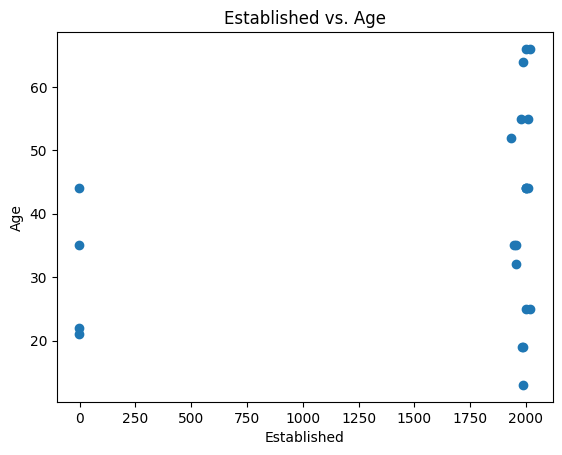

In [26]:
established_age_mismatch = df[(df['Established'] != -1) & (df['Age'] != -1) & ((2023 - df['Established']) != df['Age'])]

# Print rows where 'Established' and 'Age' do not align
print("Established and Age Mismatch:\n", established_age_mismatch)

# If you want to visualize the relationship, you can create a scatter plot
import matplotlib.pyplot as plt

plt.scatter(df['Established'], df['Age'])
plt.xlabel('Established')
plt.ylabel('Age')
plt.title('Established vs. Age')
plt.show()


12. Easy Apply Transformation

In [28]:
unique_easy_apply_values = df['Easy Apply'].unique()
print("Unique Easy Apply Values:\n", unique_easy_apply_values)
print("\nData Type of 'Easy Apply' Column:", df['Easy Apply'].dtype)

# Map non-boolean values to boolean
df['Easy Apply'] = df['Easy Apply'].map({'TRUE': True, 'FALSE': False, True: True, False: False})

# After transformation, check the data type and unique values again
print("\nData Type of 'Easy Apply' Column After Transformation:", df['Easy Apply'].dtype)
print("\nUnique Easy Apply Values After Transformation:\n", df['Easy Apply'].unique())


Unique Easy Apply Values:
 [True nan]

Data Type of 'Easy Apply' Column: object

Data Type of 'Easy Apply' Column After Transformation: object

Unique Easy Apply Values After Transformation:
 [True nan]


13. Location Accuracy

In [30]:
unique_locations = df['Location'].unique()
print("Unique Locations:\n", unique_locations)
df['Location'] = df['Location'].replace({'New York,Ny': 'New York, NY'})
unique_locations_after_correction = df['Location'].unique()
print("\nUnique Locations After Correction:\n", unique_locations_after_correction)


Unique Locations:
 ['indiain' 'new yorkny' 'india in' 'australia aus']

Unique Locations After Correction:
 ['indiain' 'new yorkny' 'india in' 'australia aus']


14. Handling Categorical Data

In [36]:
columns_to_encode = ['YourNominalColumn1', 'YourNominalColumn2', '...']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)
print(df_encoded.head())



KeyError: ignored

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to each ordinal column
df['YourOrdinalColumn'] = label_encoder.fit_transform(df['YourOrdinalColumn'])
# Display the updated DataFrame with label encoding
print(df.head())


KeyError: ignored

15. Consistent Rating Scale:

In [38]:
df['Rating_normalized'] = (df['Rating'] - df['Rating'].min()) / (df['Rating'].max() - df['Rating'].min())

# Display the updated DataFrame with normalized ratings
print(df[['Rating', 'Rating_normalized']])



    Rating  Rating_normalized
0      5.4           0.727273
1      3.5           0.511364
2     -1.0           0.000000
3      4.4           0.613636
4      6.4           0.840909
5      1.4           0.272727
6      0.0           0.113636
7     -1.0           0.000000
8      5.4           0.727273
9      7.7           0.988636
10     5.4           0.727273
11     6.7           0.875000
12     0.0           0.113636
13    -1.0           0.000000
14     4.0           0.568182
15     3.0           0.454545
16     4.5           0.625000
17     5.3           0.715909
18     6.7           0.875000
19     3.3           0.488636
20     5.7           0.761364
21     5.0           0.681818
22     7.8           1.000000
23     2.4           0.386364
24    -1.0           0.000000
25     0.0           0.113636
26     NaN                NaN
27     5.4           0.727273
28     3.4           0.500000


In [39]:
# Adjust the scale by multiplying or dividing all ratings by a factor
scale_factor = 10  # You can adjust this factor based on your analysis requirements
df['Adjusted_Rating'] = df['Rating'] * scale_factor

# Display the updated DataFrame with adjusted ratings
print(df[['Rating', 'Adjusted_Rating']])


    Rating  Adjusted_Rating
0      5.4             54.0
1      3.5             35.0
2     -1.0            -10.0
3      4.4             44.0
4      6.4             64.0
5      1.4             14.0
6      0.0              0.0
7     -1.0            -10.0
8      5.4             54.0
9      7.7             77.0
10     5.4             54.0
11     6.7             67.0
12     0.0              0.0
13    -1.0            -10.0
14     4.0             40.0
15     3.0             30.0
16     4.5             45.0
17     5.3             53.0
18     6.7             67.0
19     3.3             33.0
20     5.7             57.0
21     5.0             50.0
22     7.8             78.0
23     2.4             24.0
24    -1.0            -10.0
25     0.0              0.0
26     NaN              NaN
27     5.4             54.0
28     3.4             34.0
